In [1]:
%matplotlib inline
import geopandas as gpd
import pandas as pd
import numpy as np
import glob

In [2]:
# df_plus = gpd.read_file('2001_2002_plus.csv', geometry='.geo')
# df_plus.rename({'sum':'lake_growth'}, inplace=True)
# df_minus = gpd.read_file('2001_2002_minus.csv')
# df_minus.rename({'sum':'lake_decline'}, inplace=True)
# df_all = gpd.read_file('2001_2002_all.csv')
# df_all.rename({'sum':'total_pixels'}, inplace=True)


In [3]:
# glob.glob('gsw_reduced/gsw_reduced*/*')
# 'gsw_reduced/gsw_reduced*/*
pluses = glob.glob('gsw_reduced/gsw_reduced*/*_plus.csv')
minuses = glob.glob('gsw_reduced/gsw_reduced*/*_minus.csv')
alles = glob.glob('gsw_reduced/gsw_reduced*/*_all.csv')

df = pd.DataFrame()

for p, m, a in zip(pluses, minuses, alles):
    df_plus = pd.read_csv(p)
    df_minus = pd.read_csv(m)
    df_all = pd.read_csv(a)
    
    df_year = df_plus.merge(df_minus, on = 'HYBAS_ID').merge(df_all, on='HYBAS_ID')[['HYBAS_ID', 'sum_x', 'sum_y', 'sum']]
    # df_year['year'] = p.split('_')
    df_year['year'] = p.split('/')[2][0:4]
    # print(p)
    # print(p.split('_'))
    # df_year['region_n'] = p.split('_')[3].split('/')[0]
    df = pd.concat([df, df_year])
    
df.columns = ['HYBAS_ID', 'lake_growth', 'lake_decline', 'all', 'year']

df['growth_ratio'] = df.lake_growth/df['all']
df['decline_ratio'] = df.lake_decline/df['all']*(-1)
df['year'] = df['year'].astype(int)
df['water_balance'] = (df['lake_growth'] - df['lake_decline'])
df['water_balance_m3'] = df['water_balance'] * 30 / 1e3 * 30 / 1e3
df.sort_values('year', inplace=True)
df.drop_duplicates(inplace=True)
df.head()

,HYBAS_ID,lake_growth,lake_decline,all,year,growth_ratio,decline_ratio,water_balance,water_balance_m3
0,4060050470,131593.043137,-39598.705882,3.822362e+07,2001,0.003443,0.001036,171191.749020,154.072574
0,4060051270,18835.113725,-3166.113725,1.059303e+07,2001,0.001778,0.000299,22001.227451,19.801105
33,4060690000,4613.498039,-2496.000000,1.152214e+07,2001,0.000400,0.000217,7109.498039,6.398548
24,4060053050,5118.000000,-3828.000000,7.266895e+06,2001,0.000704,0.000527,8946.000000,8.051400
34,4060730580,1578.886275,-1924.000000,7.702896e+06,2001,0.000205,0.000250,3502.886275,3.152598


In [13]:
print(df.shape)

(887, 9)


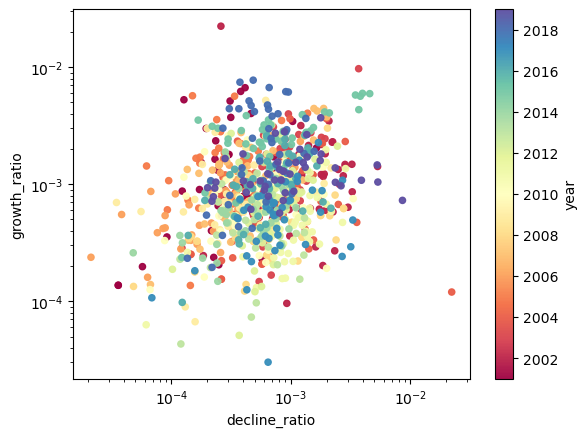

In [4]:
ax = df.plot.scatter('decline_ratio', 'growth_ratio', alpha=0.95, c='year', cmap='Spectral')
ax.set_yscale('log')
ax.set_xscale('log')

<Axes: >

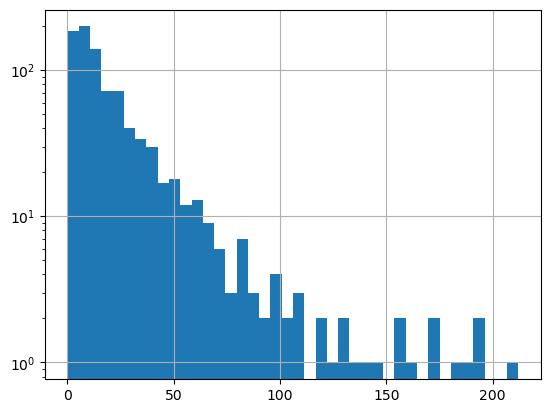

In [5]:
df.water_balance_m3.hist(bins=40, log=True)

In [6]:
df.HYBAS_ID.unique().shape

(45,)

In [7]:
df.year.unique().shape

(19,)

In [8]:
19*45

855

In [9]:
df.to_csv('lake_data.csv')

In [10]:
# df.columns = ['lg', 'ld', 'lall']
# df['lg'] = df.lg.astype(float)
# df['ld'] = df.ld.astype(float)
# df['lall'] = df.lall.astype(float)

# df['lg/lall'] = df.lg/df.lall
# df['ld/lall'] = df.ld/df.lall

In [11]:
# df.plot.scatter(x='ld/lall', y='lg/lall')

In [12]:
# df.ld/df.lall